In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify

In [2]:
plt.rc('figure',figsize=(16,9))
plt.rc('font', size=15)

In [36]:
t = sp.symbols('t')
y = sp.Function('y')
eq_1 = sp.Eq(
    sp.Derivative(y(t),t),
    (1/3)*y(t))
eq_1

Eq(Derivative(y(t), t), 0.333333333333333*y(t))

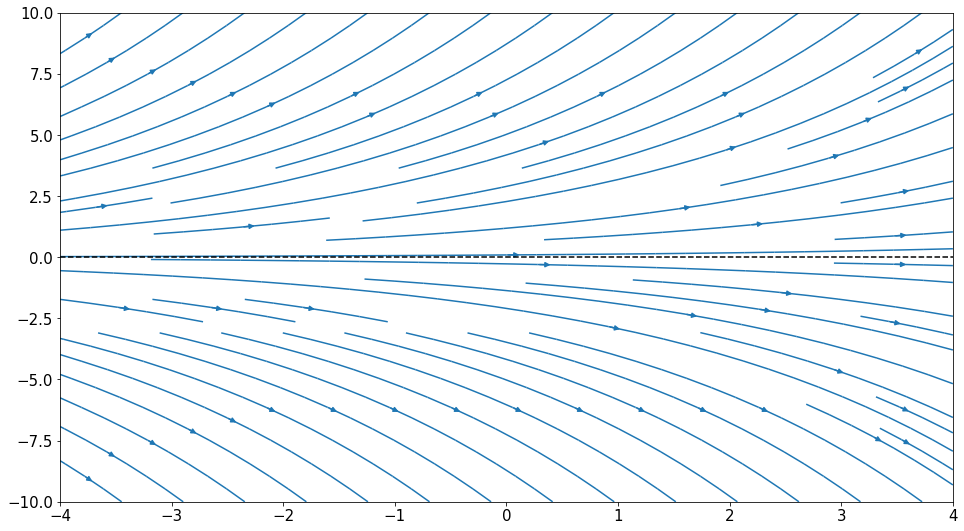

In [41]:
T,X = np.meshgrid(np.linspace(-4,4,100), np.linspace(-10,10,100)) 
plt.streamplot(T,X,np.ones(T.shape),(1/3)*X)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [38]:
solution_1 = sp.dsolve(eq_1)
solution_1

Eq(y(t), C1*exp(0.333333333333333*t))

In [33]:
#Como auxílio, traçamos soluções para diversas condições iniciais neste período
# Por exemplo, em t=0, as curvas para as condições iniciais: x(0)=1, x(0)=2, x(0)=3, ....x(0)=i
#Declarar a equação de C1: Encontramos que x(t)=C1*exp(1/3*t) então para x(0)=i : C1=i

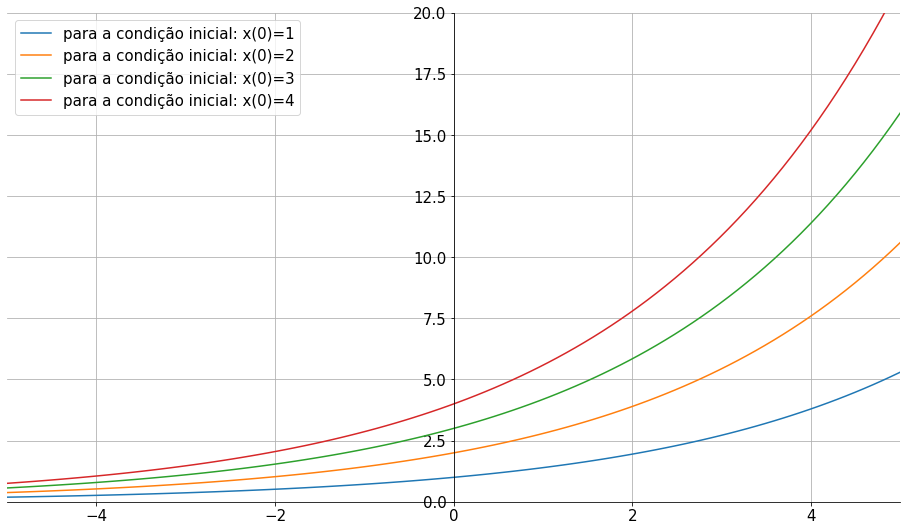

In [39]:
#Como auxílio, traçamos soluções para diversas condições iniciais neste período:
ys = np.linspace(-5,5,100)
for i in range(1,5):  
    sol1 = solution_1.rhs.subs("C1",i)
    solsol = np.vectorize(lambdify(t,sol1))
    plt.plot(ys, solsol(ys), label=f"para a condição inicial: y(0)={i}")
# Define os limites do gráfico
plt.xlim(-5, 5)
plt.ylim(0, 20)

# Centraliza os eixos
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Adiciona legenda e grade
plt.legend()
plt.grid()

# Mostra o gráfico
plt.show()